# Introduction to Seaborn
- Seaborn is a statistical plotting library
- It has beautiful default styles 
- It also is designed to work very well with pandas dataframe object

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')
#seaborn dataset

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

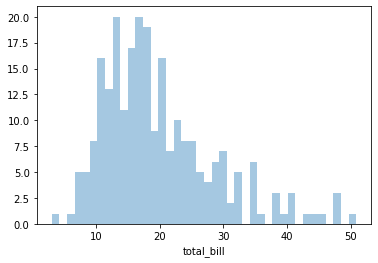

In [5]:
sns.distplot(tips['total_bill'],kde=False, bins=40)
#kde plot

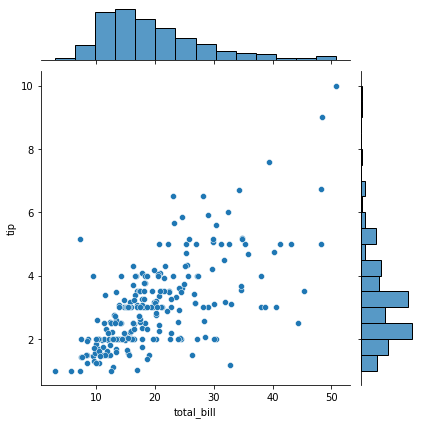

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips)

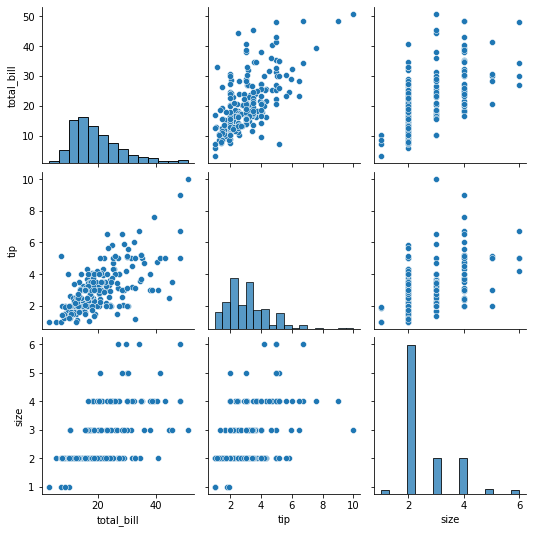

In [7]:
sns.pairplot(tips)

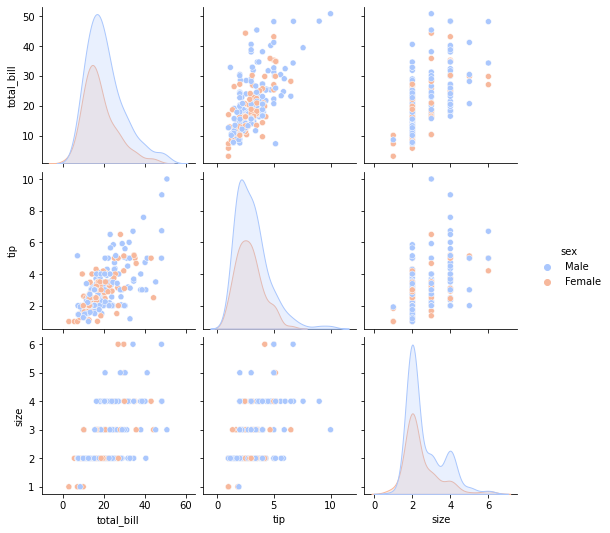

In [8]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

<AxesSubplot:xlabel='total_bill'>

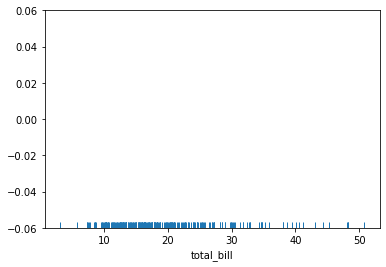

In [9]:
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

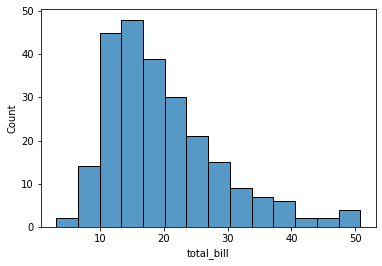

In [10]:
sns.histplot(tips['total_bill'])

(0.0, 1.0)

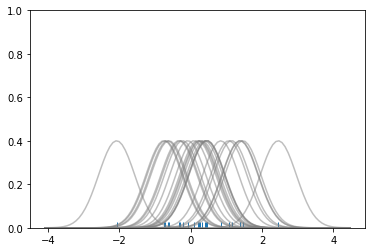

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

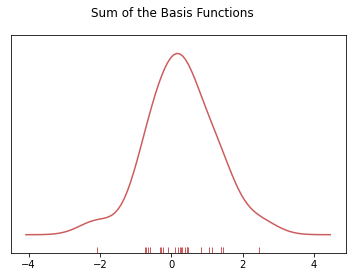

In [12]:
#To get the kde plot we can sum these basic functions
#Plot the sum of the basic funtion
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
# Add the initial rugplot
sns.rugplot(dataset,c='indianred')
plt.yticks([])
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

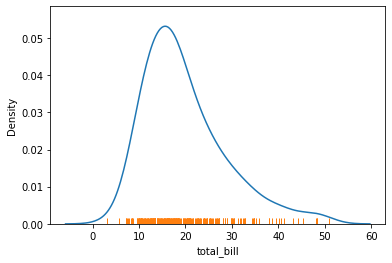

In [13]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

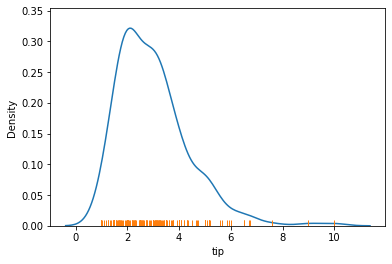

In [14]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Data Plots
- factorplot
- boxplot
- violinplot
- stripplot
- swarmplot
- barplot
- countplot

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

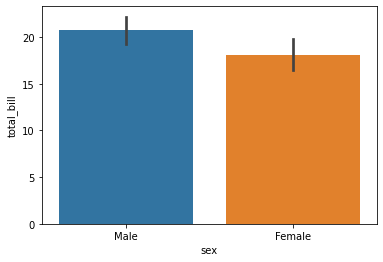

In [16]:

#barplot
sns.barplot(x='sex', y='total_bill',data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

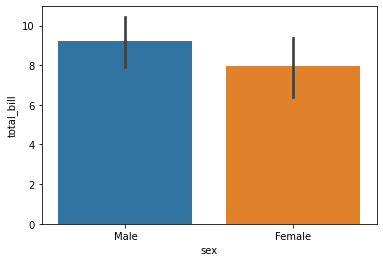

In [17]:
# change the estimator object to your own funtion, that converts a vector to a scalar
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

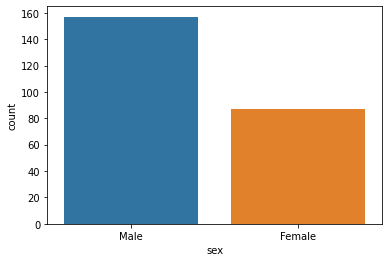

In [18]:
#countplot: counting the number of occurrences
sns.countplot(x='sex',data=tips)

# boxplot and violinplot
are used to show the distribution of categorical data

<AxesSubplot:xlabel='day', ylabel='total_bill'>

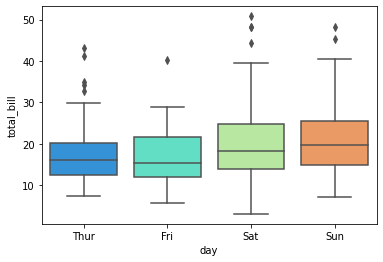

In [19]:
sns.boxplot(x='day', y='total_bill',data=tips, palette='rainbow')

<AxesSubplot:>

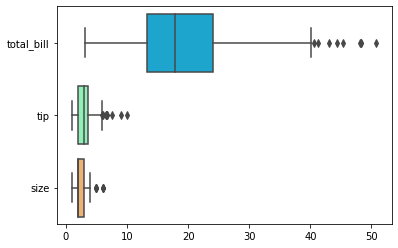

In [20]:
sns.boxplot(data=tips,palette='rainbow',orient='h')



<AxesSubplot:xlabel='day', ylabel='total_bill'>

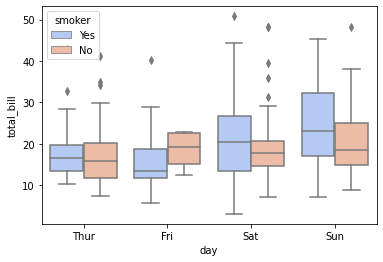

In [21]:
sns.boxplot(x='day', y='total_bill',hue='smoker', data=tips, palette='coolwarm')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

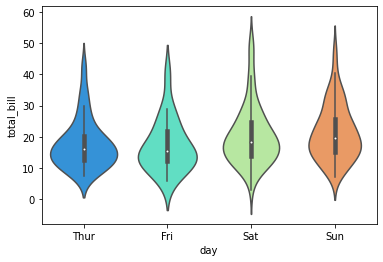

In [22]:
#violivplot same violin
sns.violinplot(x='day',y='total_bill', data=tips, palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

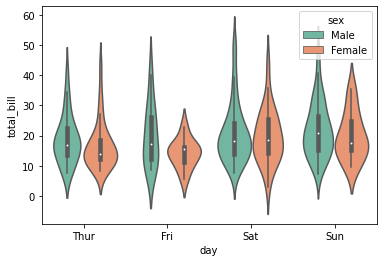

In [26]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex',palette='Set2')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

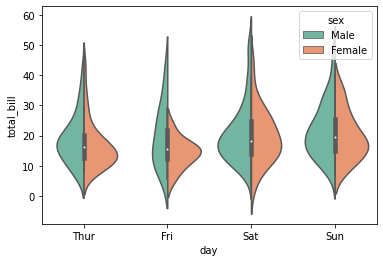

In [27]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex',split=True,palette='Set2')

# stripplot and swarmplot
draw a scatterplot where one variable is categorical